In [80]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/adult-census-income/adult.csv


# Task 2

Performing Data Cleaning and Exploratory Data Analysis on the Adult Census Income Dataset.

## 1) Import Dataset

In [81]:
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

## 2) Preview and Investigate Dataset

In [82]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### About the Dataset

- **Age**: Describes the age of individuals. It is a continuous variable.

- **Workclass**: Represents the type of employment. Categories include Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, and Never-worked.
- **fnlwgt**: Indicates the final weight, which is a continuous variable.
- **Education**: Describes the highest level of education attained. Categories include Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, and Preschool.
- **Education-num**: Represents the number of years spent in education. It is a continuous variable.
- **Marital-status**: Indicates the marital status of individuals. Categories include Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, and Married-AF-spouse.
- **Occupation**: Describes the type of occupation. Categories include Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, and Armed-Forces.
- **Relationship**: Represents the relationship status. Categories include Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried.
- **Race**: Indicates the race of individuals. Categories include White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, and Black.
- **Sex**: Represents the gender of individuals. Categories include Female and Male.
- **Capital-gain**: Describes the capital gains. It is a continuous variable.
- **Capital-loss**: Represents the capital losses. It is a continuous variable.
- **Hours-per-week**: Indicates the number of hours worked per week. It is a continuous variable.
- **Native-country**: Describes the native country. Categories include various countries such as the United-States, Cambodia, England, Puerto-Rico, Canada, Germany, and more.
- **Salary**: Represents the income level, with categories >50K and <=50K.

This dataset provides demographic information about individuals and their income levels, which can be used for various data analysis and modeling tasks.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### First Observation 



The dataset is **devoid of any missing values**, which is a positive aspect. It comprises **integer columns** like **Age, Final Weight, Education Number, Capital Gain, Capital Loss, and Hours Per Week**. Conversely, there are no **float data types** present.

Several columns, namely **Workclass, Education, Marital Status, Occupation, Relationship, Race, Sex, Native Country, and Income**, are of **object data type**, denoting categorical variables.

Upon closer examination, it becomes apparent that the dataset contains numerous **'?' values**. Therefore, it becomes necessary to address and replace these values appropriately.

In summary, the dataset exhibits a lack of missing values but requires attention to replace the **'?' values** present. The data consists of **integer and object data types**, representing various demographic and socioeconomic factors.

In [85]:
df.shape

(32561, 15)

In [86]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Second Observation

The dataset includes individuals with **ages ranging from 19 to 90 years**, with an **average age of 37**. The **years spent on education range from 1 to 16**, with an **average education level of 10 years**. There seems to be an **unusual maximum capital gain value of 99999**, suggesting a potential **data error**. The **number of hours worked per week varies from 1 to 99**, with an **average of 40 hours**.

Summary:

- **Age**: Range **19-90**, Average **37**
- **Education**: Years spent range **1-16**, Average level **10**
- **Capital Gain**: Unusual maximum value of **99999**, potential **data error**
- **Hours per Week**: Range **1-99**, Average **40**

In [87]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

## 3) Data Cleaning

#### Replacing '?' with NaN

In [88]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset reveals the presence of **null values** in the columns **workclass, occupation, and native-country**. To handle these missing values, a straightforward approach is to **impute** them using the **mode**, which represents the most frequently occurring value in each respective column.

In [89]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Converting the Categorical to appropriate data types

In [90]:
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for col in categorical_cols:
    df[col] = df[col].astype('category')

#### Convert age and education-num to numeric data types

In [91]:
df['age'] = df['age'].astype(int)
df['education.num'] = df['education.num'].astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  object  
dtypes: category(8), int64(6), object(1)
memory usage: 2.0+ MB


#### Check for duplicates

In [93]:
df = df.drop_duplicates()

#### Drop irrelevant columns

In [94]:
df = df.drop(['fnlwgt'], axis=1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  int64   
 1   workclass       32537 non-null  category
 2   education       32537 non-null  category
 3   education.num   32537 non-null  int64   
 4   marital.status  32537 non-null  category
 5   occupation      32537 non-null  category
 6   relationship    32537 non-null  category
 7   race            32537 non-null  category
 8   sex             32537 non-null  category
 9   capital.gain    32537 non-null  int64   
 10  capital.loss    32537 non-null  int64   
 11  hours.per.week  32537 non-null  int64   
 12  native.country  32537 non-null  category
 13  income          32537 non-null  object  
dtypes: category(8), int64(5), object(1)
memory usage: 2.0+ MB


#### Handling Outliers

In [96]:
# Specify the columns to handle outliers
numeric_cols = ['age', 'education.num', 'capital.gain', 'hours.per.week']

# Define your outlier handling strategy for each column
outlier_handling = {
    'age': 'winsorize',
    'education.num': 'transform',
    'capital.gain': 'remove',
    'hours.per.week': 'winsorize'
}

#### Remove, Transform and Winsorize

In [97]:
# Loop over the specified columns and apply the corresponding outlier handling strategy
for col in numeric_cols:
    strategy = outlier_handling[col]

    if strategy == 'remove':
        # Remove rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    elif strategy == 'transform':
        # Apply a transformation (e.g., log transformation) to reduce the impact of outliers
        df[col] = np.log1p(df[col])
    elif strategy == 'winsorize':
        # Apply winsorization to cap extreme values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29825 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29825 non-null  float64 
 1   workclass       29825 non-null  category
 2   education       29825 non-null  category
 3   education.num   29825 non-null  float64 
 4   marital.status  29825 non-null  category
 5   occupation      29825 non-null  category
 6   relationship    29825 non-null  category
 7   race            29825 non-null  category
 8   sex             29825 non-null  category
 9   capital.gain    29825 non-null  int64   
 10  capital.loss    29825 non-null  int64   
 11  hours.per.week  29825 non-null  float64 
 12  native.country  29825 non-null  category
 13  income          29825 non-null  object  
dtypes: category(8), float64(3), int64(2), object(1)
memory usage: 1.8+ MB
None


## Exploratory Data Analysis

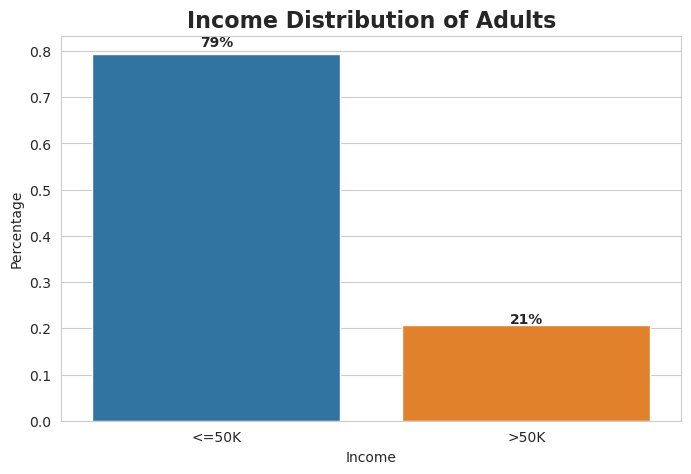

In [99]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=16, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage.head(10))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

During my analysis, I noticed a clear trend in the target variable. Only **one third** of the individuals in the dataset earn **more than 50K dollars per year**, while the majority earn **less than 50K dollars**. It is essential to bear in mind that this data was collected in 1996, and the purchasing power of 50K dollars back then may differ significantly in today's context.

In [100]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

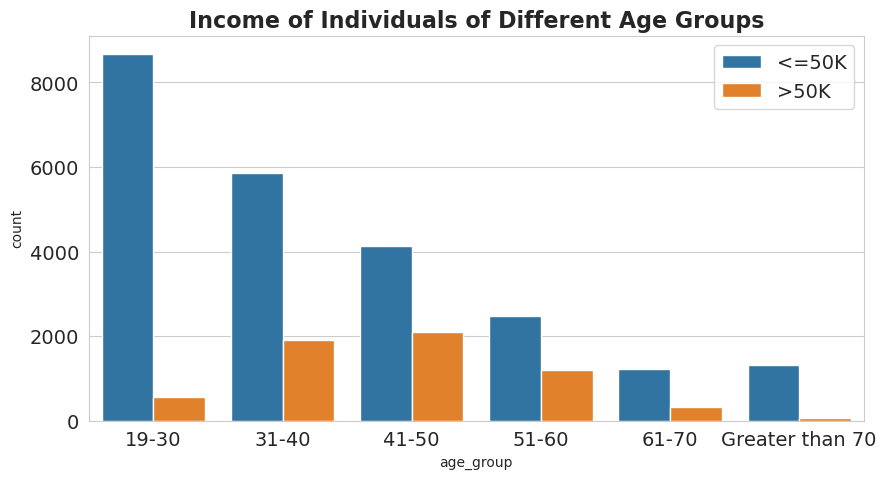

In [101]:
plt.figure(figsize=(10,5))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='age_group', hue='income', data=df, order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)


In my analysis, I noticed an interesting pattern regarding income and age. As **age** increases, there is a notable increase in the **number of individuals earning more than 50K dollars**. Notably, among individuals **aged 19-30**, the proportion of people earning more than 50K is **quite low**. However, in the **age groups 41-50 and 51-60**, the number of individuals earning more than 50K **is comparable** to those earning less.

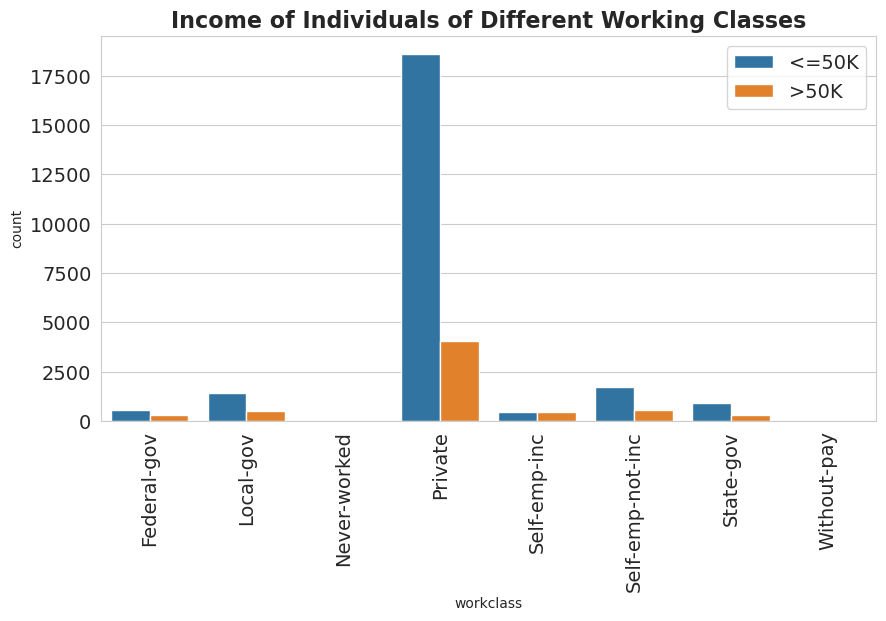

In [102]:
plt.figure(figsize=(10, 5))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income of Individuals of Different Working Classes', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

After analyzing the data, I found interesting patterns when examining the incomes of adults based on their working classes. Notably, being **Self-Employed** stands out as the category where more individuals earn more than 50K dollars, possibly suggesting that successful self-employment can lead to higher earnings. Conversely, in the **Private Sector**, the majority of individuals earn less than 50K dollars, highlighting a significant income disparity. Meanwhile, the **Federal Government** category shows a relatively balanced distribution of income levels. It is important to acknowledge that the **Without-Pay** and **Never-Worked** categories have limited data available.

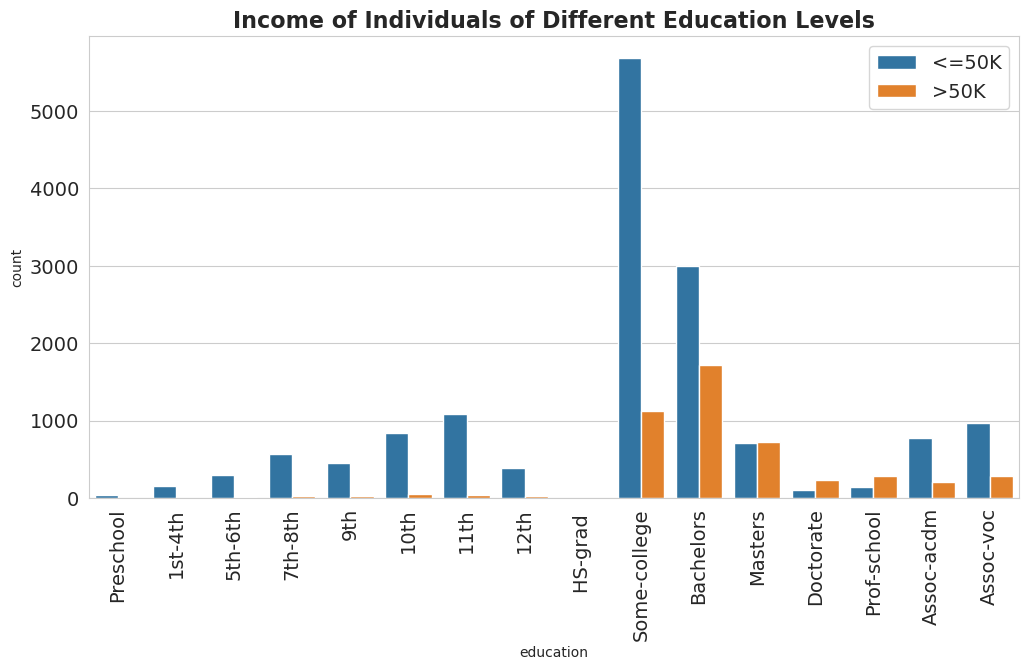

In [103]:
plt.figure(figsize=(12,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x = 'education', hue = 'income', data = df, order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

During my analysis, I discovered intriguing trends regarding education levels and incomes. Individuals who completed education up to **12th Standard** have a majority earning below **50K dollars per year**, while those with higher education levels such as **Bachelors, Masters, Doctorate, and Prof-school** exhibit a greater number of people earning **more than 50K dollars** annually. However, for those with **Assoc-acad or Assoc-voc** qualifications, the proportion of individuals earning **more than 50K dollars** is relatively low.

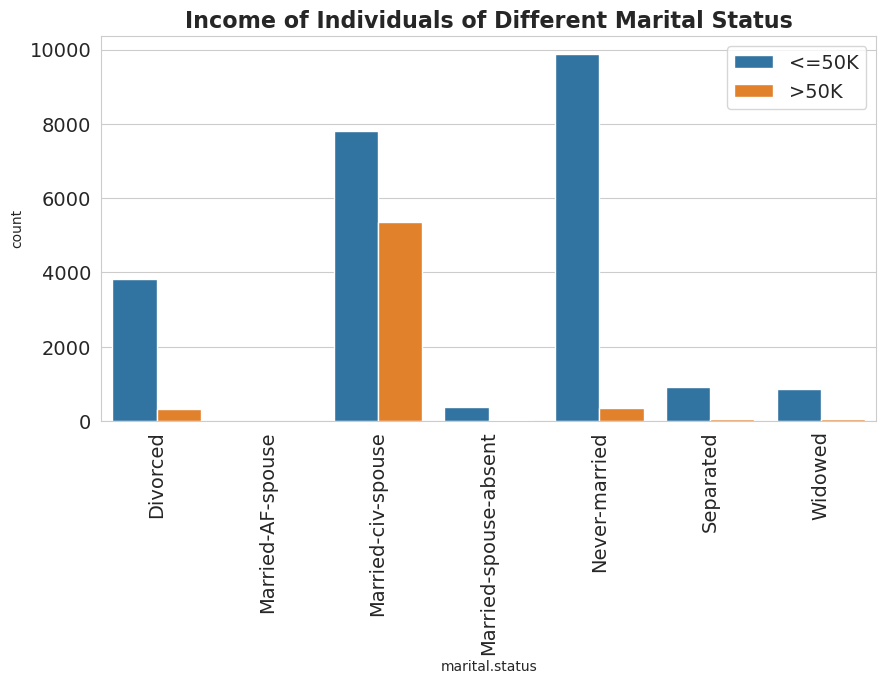

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'marital.status', hue = 'income', data = df)
plt.title('Income of Individuals of Different Marital Status', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

An important observation to highlight is that within the marital status categories, only **Married-civ-spouse** shows a relatively balanced distribution of individuals across both income groups. However, for the other marital status categories, the percentage of adults earning more than 50K dollars annually is less than 25%.

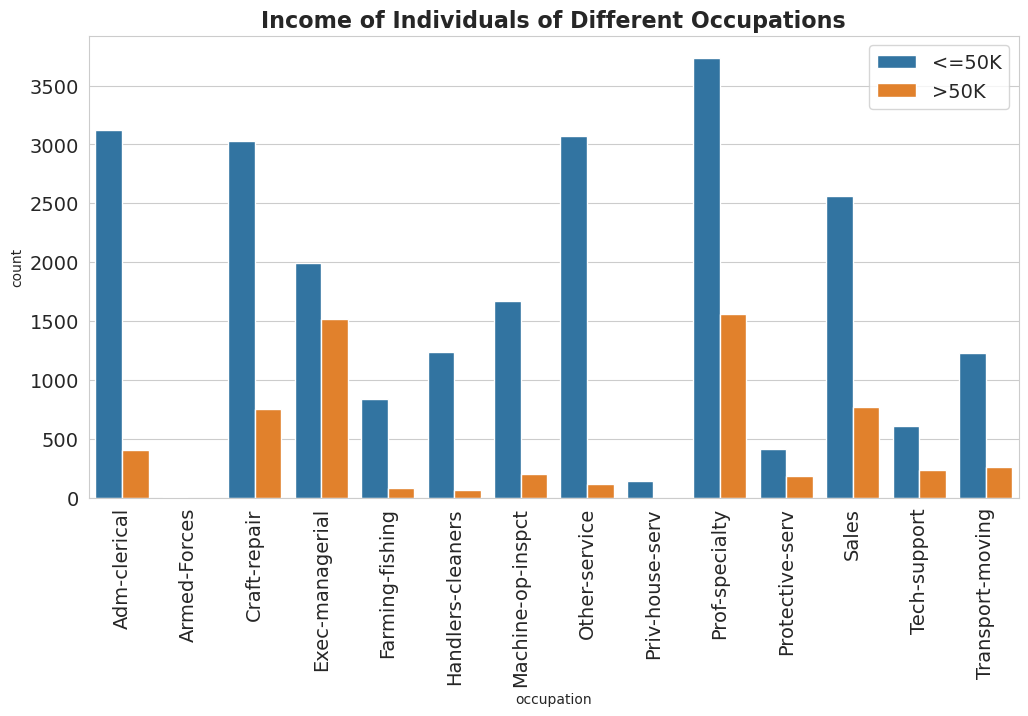

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'occupation', hue = 'income', data = df)
plt.title('Income of Individuals of Different Occupations', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

Based on my analysis, adults in **Exec-managerial** roles exhibit an an almost likelihood of earning more than 50K dollars per year. In contrast, individuals in occupations such as **Prof-specialty** have a approximately a 33% probability of earning above the 50K threshold. However, those working in occupations like **Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, and Transport-moving** are less likely to earn more than 50K dollars annually. Additionally, approximately 25% of individuals in the **Sales** occupation earn above 50K dollars per year.

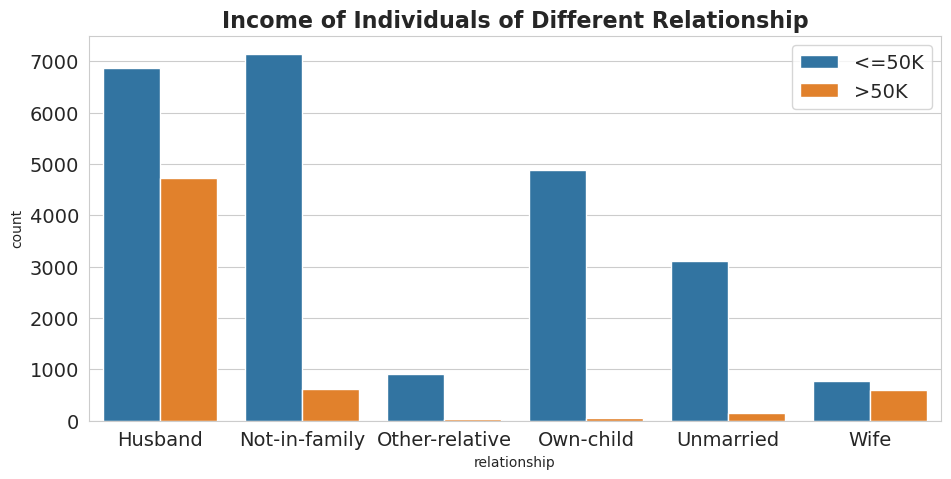

In [106]:
plt.figure(figsize=(11,5))
sns.countplot(x = 'relationship', hue = 'income', data = df)
plt.title('Income of Individuals of Different Relationship', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In my analysis, I observed that **wives** have an equal likelihood of earning more than 50K dollars annually. Conversely, for **husbands**, although a significant proportion falls into this category, the possibility of earning above 50K dollars per year is comparatively lower. Additionally, the number of **unmarried** individuals earning more than 50K dollars annually is quite small.

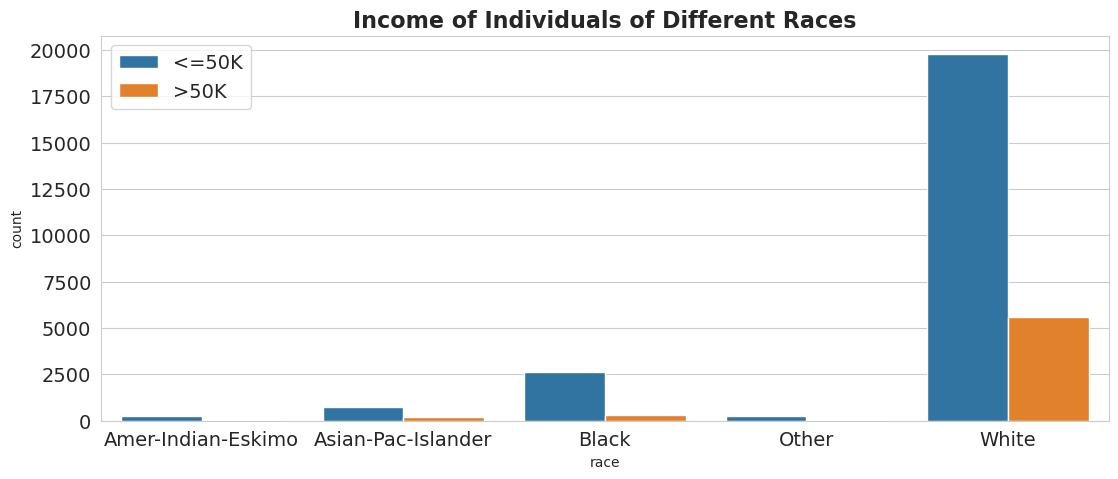

In [107]:
plt.figure(figsize=(13,5))
sns.countplot(x = 'race', hue = 'income', data = df)
plt.title('Income of Individuals of Different Races', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

One crucial point to note is that, with the exception of the **White** race, the dataset has a sparse representation of individuals from other races. This lack of diversity may limit the ability to determine the precise percentage and relationship of individuals earning more than 50K dollars annually for those races.

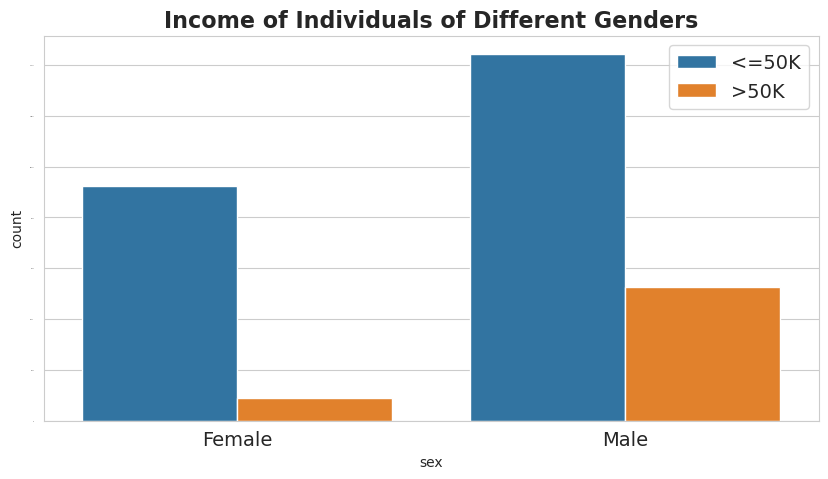

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'sex', hue = 'income', data = df)
plt.title('Income of Individuals of Different Genders', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=1)
plt.legend(fontsize=14)

In the dataset, a significant earnings gap between males and females is evident. Less than 10% of females earn more than 50K dollars per year, while approximately 33% of males surpass this income threshold.

In [109]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

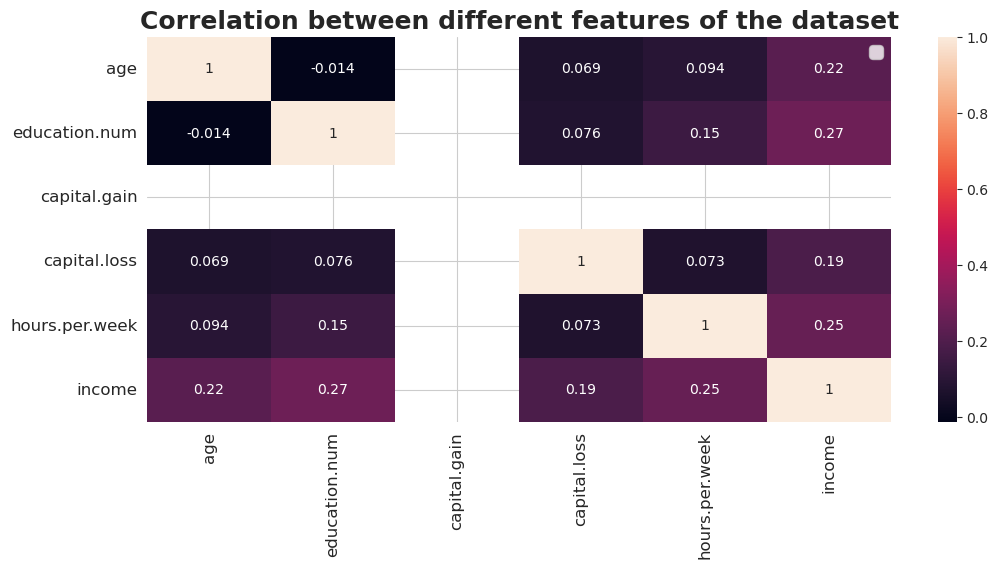

In [110]:
plt.figure(figsize = (12,5))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In my analysis, I created a **correlation map** to explore the relationship between the independent features and the dependent feature, which is the **income variable**. The map revealed that most of the features demonstrate a **positive correlation** with income. However, it is crucial to acknowledge that this correlation graph does not encompass the **object datatypes** present in the dataset.

## Conclusion

In this notebook, our objective was to understand the Adult Census Income dataset available on Kaggle. We accomplished this by performing data cleaning, preparation, and exploratory data analysis (EDA) specifically focused on categorical data using histograms. Through our analysis and the creation of histograms, we were able to gain better insights into the income distribution across different categories. Our EDA process provided us with valuable information about the dataset itself, further enhancing our understanding of its characteristics and patterns.